In [1838]:
# 라이브러리
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore') 

pd.options.display.float_format = '{:.5f}'.format # 지수표현을 소숫점 표현으로

In [1839]:
data1 = pd.read_csv('../dataset/data1.csv') # 지하철 혼잡도 정보 2020년 7월 8일 데이터??

# data2 = pd.read_csv('../dataset/data2.csv') # 역사 대기 정보
data2 = pd.read_csv('../dataset/new_data2.csv')

data3 = pd.read_csv('../dataset/data3.csv') # 자치구별 지하철역 정보

In [1840]:
data1.shape

(1668, 44)

In [1841]:
data1['역명'].value_counts() # 18 / 12 / 6 ==> 상.하선, 평일 토요일 일요일

종로3가         18
동대문역사문화공원    18
을지로4가        12
고속터미널        12
천호           12
             ..
먹골            6
상왕십리          6
문정            6
방화            6
천왕            6
Name: 역명, Length: 241, dtype: int64

In [1842]:
data1['호선'].value_counts()

7호선     306
5호선     306
2호선     258
6호선     228
3호선     204
4호선     156
8호선     102
1호선      60
신정지선     24
성수지선     24
Name: 호선, dtype: int64

In [1843]:
data1[data1['역명'] == '종로3가']

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
6,평일,1호선,153,종로3가,상선,6.30000,8.10000,14.40000,16.30000,22.90000,...,27.10000,25.20000,32.90000,33.80000,40.10000,28.90000,20.50000,14.20000,10.40000,1.20000
7,평일,1호선,153,종로3가,하선,12.10000,12.20000,15.90000,23.10000,39.90000,...,20.00000,15.60000,18.50000,21.40000,21.90000,19.00000,12.80000,10.90000,2.60000,1.30000
142,평일,3호선,319,종로3가,상선,16.90000,15.00000,14.20000,25.30000,35.00000,...,59.10000,49.70000,54.70000,50.30000,62.70000,49.80000,45.90000,30.20000,21.20000,11.70000
143,평일,3호선,319,종로3가,하선,25.20000,26.60000,34.00000,49.50000,56.30000,...,18.90000,18.20000,23.30000,22.00000,23.30000,18.00000,16.30000,9.00000,3.90000,3.20000
290,평일,5호선,2535,종로3가,상선,13.80000,21.90000,24.00000,39.30000,57.20000,...,21.50000,21.70000,21.60000,24.50000,25.30000,20.80000,18.00000,15.60000,13.70000,4.60000
291,평일,5호선,2535,종로3가,하선,7.20000,13.90000,11.90000,16.40000,23.50000,...,37.10000,36.40000,39.10000,37.40000,41.00000,36.00000,25.10000,18.90000,8.10000,7.20000
562,토요일,1호선,153,종로3가,상선,5.40000,12.50000,12.20000,12.30000,15.40000,...,24.60000,24.30000,26.70000,28.10000,31.90000,25.30000,19.90000,24.90000,NaN,NaN
563,토요일,1호선,153,종로3가,하선,15.20000,13.30000,12.80000,13.50000,11.50000,...,20.60000,18.00000,21.60000,24.10000,22.80000,18.10000,13.60000,8.10000,NaN,NaN
698,토요일,3호선,319,종로3가,상선,16.00000,15.90000,10.80000,10.50000,14.90000,...,43.40000,45.90000,43.60000,49.70000,50.40000,51.00000,42.80000,22.40000,NaN,NaN
699,토요일,3호선,319,종로3가,하선,17.80000,16.60000,15.00000,18.10000,23.40000,...,24.10000,23.00000,28.10000,21.40000,23.80000,19.10000,14.50000,9.40000,NaN,NaN


In [1844]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,15.10000,15.90000,17.10000,16.00000,19.00000,15.20000,10.50000,7.80000,6.00000,0.90000
1,평일,1호선,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,36.50000,31.20000,37.60000,44.60000,45.60000,37.80000,28.80000,19.30000,7.10000,0.40000
2,평일,1호선,151,시청,상선,7.70000,11.20000,19.60000,24.40000,36.20000,...,18.70000,18.30000,20.70000,22.00000,24.00000,18.70000,13.70000,10.00000,6.90000,1.00000
3,평일,1호선,151,시청,하선,9.50000,11.30000,11.60000,16.70000,23.20000,...,32.00000,27.70000,34.80000,39.30000,37.40000,36.30000,23.00000,18.10000,4.00000,1.60000
4,평일,1호선,152,종각,상선,6.30000,8.10000,15.50000,16.60000,22.70000,...,25.80000,24.20000,30.00000,31.90000,34.00000,26.80000,18.80000,12.50000,9.10000,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8호선,2825,신흥,하선,6.90000,3.40000,4.00000,2.80000,6.30000,...,3.50000,3.00000,3.10000,3.50000,2.90000,2.30000,2.10000,1.70000,NaN,NaN
1664,일요일,8호선,2826,수진,상선,2.40000,2.20000,2.20000,2.20000,2.50000,...,4.60000,6.40000,5.90000,4.80000,5.50000,4.40000,3.40000,1.50000,NaN,NaN
1665,일요일,8호선,2826,수진,하선,11.00000,3.70000,3.20000,2.60000,4.10000,...,2.80000,2.30000,1.90000,1.40000,1.30000,1.40000,1.00000,0.40000,NaN,NaN
1666,일요일,8호선,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,4.50000,5.10000,5.90000,5.30000,5.70000,4.20000,3.40000,1.50000,NaN,NaN


In [1845]:
data1['조사일자'].value_counts() # 평일, 토요일, 일요일 다 같은 숫자.

일요일    556
평일     556
토요일    556
Name: 조사일자, dtype: int64

In [1846]:
data2

,호선명,역명,미세먼지_PM-10(140 ㎍/㎥ 이하),이산화탄소_CO2 (1000 ppm 이하),포름알데히드_HCHO(100 ㎍/㎥ 이하),일산화탄소_CO(9 ppm이하)
0,1호선,서울역,70.50000,606,4.00000,0.80000
1,1호선,시청,54.70000,581,4.40000,0.70000
2,1호선,종각,82.90000,471,11.50000,0.70000
3,1호선,종로3가,70.40000,481,11.00000,1.00000
4,1호선,종로5가,70.20000,597,5.70000,0.80000
...,...,...,...,...,...,...
249,8호선,남한산성입구,43.20000,504,5.90000,0.50000
250,8호선,단대오거리,47.00000,518,6.90000,0.50000
251,8호선,신흥,59.60000,511,31.30000,0.50000
252,8호선,수진,71.60000,490,12.90000,0.60000


In [1847]:
data1.shape

(1668, 44)

In [1848]:
data1.columns

Index(['조사일자', '호선', '역번호', '역명', '구분', '5:30', '6:00', '6:30', '7:00', '7:30',
       '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30',
       '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
       '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
       '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30',
       '24:00:00', '24:30:00'],
      dtype='object')

In [1849]:
data1[data1['조사일자'] == '평일'].mean()['18:00']

51.665467625899325

In [1850]:
data1[data1['조사일자'] == '토요일'].mean()['18:00']

39.2147005444646

In [1851]:
data1[data1['조사일자'] == '일요일'].mean()['18:00']

25.80598911070781

- 평일 > 토요일 > 일요일 순

In [1852]:
data2.columns

Index(['호선명', '역명', '미세먼지_PM-10(140 ㎍/㎥ 이하)', '이산화탄소_CO2 (1000 ppm 이하)',
       '포름알데히드_HCHO(100 ㎍/㎥ 이하)', '일산화탄소_CO(9 ppm이하)'],
      dtype='object')

In [1853]:
data2.columns = ['호선', '역명', '미세먼지', '이산화탄소', '포름알데히드', '일산화탄소']

In [1854]:
A = data2.groupby('호선').mean()
A = A.reset_index()
A # 호선별 공기질 평균

,호선,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,1호선,67.33000,566.60000,5.66000,0.82000
1,2호선,63.73784,607.62162,5.59459,0.68378
2,3호선,57.27500,578.78125,6.12812,0.63437
3,4호선,67.99524,542.66667,6.75238,0.62381
4,5호선,67.36078,513.90196,7.60980,0.97255
5,6호선,66.61842,510.76316,8.15526,0.68947
6,7호선,72.56875,560.33333,7.81250,0.68958
7,8호선,60.72353,531.88235,7.63529,0.52941


In [1855]:
def trim1(A):
    if A[-2:] == '호선':
        A = A[0:-2]
    return A

A['호선'] = A['호선'].apply(trim1)
A

# 1호선 -> 1

,호선,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,1,67.33000,566.60000,5.66000,0.82000
1,2,63.73784,607.62162,5.59459,0.68378
2,3,57.27500,578.78125,6.12812,0.63437
3,4,67.99524,542.66667,6.75238,0.62381
4,5,67.36078,513.90196,7.60980,0.97255
5,6,66.61842,510.76316,8.15526,0.68947
6,7,72.56875,560.33333,7.81250,0.68958
7,8,60.72353,531.88235,7.63529,0.52941


In [1856]:
data1.groupby('호선').mean().transpose().mean() # 호선별 혼잡도

호선
1호선    28.66304
2호선    42.05455
3호선    34.91566
4호선    40.43323
5호선    84.12821
6호선    85.19583
7호선    97.31342
8호선    94.00000
성수지선   15.60000
신정지선   28.66427
dtype: float64

In [1857]:
B = pd.DataFrame(data1.groupby('호선').mean().transpose().mean()) # 혼잡도
B

,0
호선,
1호선,28.66304
2호선,42.05455
3호선,34.91566
4호선,40.43323
5호선,84.12821
6호선,85.19583
7호선,97.31342
8호선,94.00000
성수지선,15.60000


In [1858]:
B = pd.DataFrame(data1.groupby('호선').mean().transpose().mean()) # 혼잡도
B = B.reset_index()
B['호선'] = ['1','2','3','4','5','6','7','8','성수','신정']
B.columns = '호선', '혼잡도'
B # 호선별 혼잡도

,호선,혼잡도
0,1,28.66304
1,2,42.05455
2,3,34.91566
3,4,40.43323
4,5,84.12821
5,6,85.19583
6,7,97.31342
7,8,94.00000
8,성수,15.60000
9,신정,28.66427


In [1859]:
# C = pd.merge(A,B, left_on = '호선', right_on = '호선')
C = pd.merge(A,B)
C # 호선별 공기질 , 혼잡도

,호선,미세먼지,이산화탄소,포름알데히드,일산화탄소,혼잡도
0,1,67.33000,566.60000,5.66000,0.82000,28.66304
1,2,63.73784,607.62162,5.59459,0.68378,42.05455
2,3,57.27500,578.78125,6.12812,0.63437,34.91566
3,4,67.99524,542.66667,6.75238,0.62381,40.43323
4,5,67.36078,513.90196,7.60980,0.97255,84.12821
5,6,66.61842,510.76316,8.15526,0.68947,85.19583
6,7,72.56875,560.33333,7.81250,0.68958,97.31342
7,8,60.72353,531.88235,7.63529,0.52941,94.00000


In [1860]:
C.corr()['혼잡도']

미세먼지      0.31623
이산화탄소    -0.62637
포름알데히드    0.91666
일산화탄소    -0.01277
혼잡도       1.00000
Name: 혼잡도, dtype: float64

In [1861]:
C.corr()

,미세먼지,이산화탄소,포름알데히드,일산화탄소,혼잡도
미세먼지,1.00000,-0.25074,0.34395,0.40839,0.31623
이산화탄소,-0.25074,1.00000,-0.82399,-0.21541,-0.62637
포름알데히드,0.34395,-0.82399,1.00000,-0.02193,0.91666
일산화탄소,0.40839,-0.21541,-0.02193,1.00000,-0.01277
혼잡도,0.31623,-0.62637,0.91666,-0.01277,1.00000


In [1862]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,15.10000,15.90000,17.10000,16.00000,19.00000,15.20000,10.50000,7.80000,6.00000,0.90000
1,평일,1호선,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,36.50000,31.20000,37.60000,44.60000,45.60000,37.80000,28.80000,19.30000,7.10000,0.40000
2,평일,1호선,151,시청,상선,7.70000,11.20000,19.60000,24.40000,36.20000,...,18.70000,18.30000,20.70000,22.00000,24.00000,18.70000,13.70000,10.00000,6.90000,1.00000
3,평일,1호선,151,시청,하선,9.50000,11.30000,11.60000,16.70000,23.20000,...,32.00000,27.70000,34.80000,39.30000,37.40000,36.30000,23.00000,18.10000,4.00000,1.60000
4,평일,1호선,152,종각,상선,6.30000,8.10000,15.50000,16.60000,22.70000,...,25.80000,24.20000,30.00000,31.90000,34.00000,26.80000,18.80000,12.50000,9.10000,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8호선,2825,신흥,하선,6.90000,3.40000,4.00000,2.80000,6.30000,...,3.50000,3.00000,3.10000,3.50000,2.90000,2.30000,2.10000,1.70000,NaN,NaN
1664,일요일,8호선,2826,수진,상선,2.40000,2.20000,2.20000,2.20000,2.50000,...,4.60000,6.40000,5.90000,4.80000,5.50000,4.40000,3.40000,1.50000,NaN,NaN
1665,일요일,8호선,2826,수진,하선,11.00000,3.70000,3.20000,2.60000,4.10000,...,2.80000,2.30000,1.90000,1.40000,1.30000,1.40000,1.00000,0.40000,NaN,NaN
1666,일요일,8호선,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,4.50000,5.10000,5.90000,5.30000,5.70000,4.20000,3.40000,1.50000,NaN,NaN


In [1863]:
data1.groupby('역명').mean().transpose().mean()

역명
가락시장       64.41171
가산디지털단지   102.12917
강남         51.53833
강남구청      102.28833
강동         83.34042
             ...   
홍제         38.00417
화곡         82.43042
화랑대        71.89708
회현         43.12583
효창공원앞      89.13750
Length: 241, dtype: float64

In [1864]:
data2

,호선,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,1호선,서울역,70.50000,606,4.00000,0.80000
1,1호선,시청,54.70000,581,4.40000,0.70000
2,1호선,종각,82.90000,471,11.50000,0.70000
3,1호선,종로3가,70.40000,481,11.00000,1.00000
4,1호선,종로5가,70.20000,597,5.70000,0.80000
...,...,...,...,...,...,...
249,8호선,남한산성입구,43.20000,504,5.90000,0.50000
250,8호선,단대오거리,47.00000,518,6.90000,0.50000
251,8호선,신흥,59.60000,511,31.30000,0.50000
252,8호선,수진,71.60000,490,12.90000,0.60000


In [1865]:
data2['역명']

0         서울역
1          시청
2          종각
3        종로3가
4        종로5가
        ...  
249    남한산성입구
250     단대오거리
251        신흥
252        수진
253        모란
Name: 역명, Length: 254, dtype: object

In [1866]:
data2.dtypes

호선         object
역명         object
미세먼지      float64
이산화탄소       int64
포름알데히드    float64
일산화탄소     float64
dtype: object

In [1867]:
def trim1(A):
    if A[-2:] == '호선':
        A = A[0:-2]
    return A

In [1868]:
def trim2(A):
    if (A[-1] == '1') or (A[-1] == '2') or (A[-1] == '3') or (A[-1] == '4'):
        A = A[0:-1]
    return A

In [1869]:
data2['역명'] = data2['역명'].apply(trim2)

In [1870]:
data1['호선'] = data1['호선'].apply(trim1)

In [1871]:
data1['호선']

0       1
1       1
2       1
3       1
4       1
       ..
1663    8
1664    8
1665    8
1666    8
1667    8
Name: 호선, Length: 1668, dtype: object

In [1872]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,15.10000,15.90000,17.10000,16.00000,19.00000,15.20000,10.50000,7.80000,6.00000,0.90000
1,평일,1,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,36.50000,31.20000,37.60000,44.60000,45.60000,37.80000,28.80000,19.30000,7.10000,0.40000
2,평일,1,151,시청,상선,7.70000,11.20000,19.60000,24.40000,36.20000,...,18.70000,18.30000,20.70000,22.00000,24.00000,18.70000,13.70000,10.00000,6.90000,1.00000
3,평일,1,151,시청,하선,9.50000,11.30000,11.60000,16.70000,23.20000,...,32.00000,27.70000,34.80000,39.30000,37.40000,36.30000,23.00000,18.10000,4.00000,1.60000
4,평일,1,152,종각,상선,6.30000,8.10000,15.50000,16.60000,22.70000,...,25.80000,24.20000,30.00000,31.90000,34.00000,26.80000,18.80000,12.50000,9.10000,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8,2825,신흥,하선,6.90000,3.40000,4.00000,2.80000,6.30000,...,3.50000,3.00000,3.10000,3.50000,2.90000,2.30000,2.10000,1.70000,NaN,NaN
1664,일요일,8,2826,수진,상선,2.40000,2.20000,2.20000,2.20000,2.50000,...,4.60000,6.40000,5.90000,4.80000,5.50000,4.40000,3.40000,1.50000,NaN,NaN
1665,일요일,8,2826,수진,하선,11.00000,3.70000,3.20000,2.60000,4.10000,...,2.80000,2.30000,1.90000,1.40000,1.30000,1.40000,1.00000,0.40000,NaN,NaN
1666,일요일,8,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,4.50000,5.10000,5.90000,5.30000,5.70000,4.20000,3.40000,1.50000,NaN,NaN


In [1873]:
data1.groupby('호선').mean()['8:00']

호선
1      25.24833
2      39.87403
3      30.79657
4      35.47115
5      25.98431
6      23.95917
7      37.17908
8      32.53235
성수지선   15.21667
신정지선   35.83750
Name: 8:00, dtype: float64

In [1874]:
p = data1.groupby('역명').mean().transpose().mean()
p = pd.DataFrame (p)
p = p.reset_index()
p.columns = ['역사명', '혼잡도'] # data1에서 가져옴

In [1875]:
p

,역사명,혼잡도
0,가락시장,64.41171
1,가산디지털단지,102.12917
2,강남,51.53833
3,강남구청,102.28833
4,강동,83.34042
...,...,...
236,홍제,38.00417
237,화곡,82.43042
238,화랑대,71.89708
239,회현,43.12583


In [1876]:
p['혼잡도'] = pd.DataFrame(data1.groupby('역명').mean()['18:00']).reset_index()['18:00']

In [1877]:
data1.groupby('역명').mean().reset_index()['18:00']

0     40.77500
1     58.61667
2     67.48333
3     52.28333
4     25.75000
        ...   
236   42.43333
237   27.38333
238    6.86667
239   52.95000
240   40.88333
Name: 18:00, Length: 241, dtype: float64

In [1878]:
p

,역사명,혼잡도
0,가락시장,40.77500
1,가산디지털단지,58.61667
2,강남,67.48333
3,강남구청,52.28333
4,강동,25.75000
...,...,...
236,홍제,42.43333
237,화곡,27.38333
238,화랑대,6.86667
239,회현,52.95000


In [1879]:
data2.drop('호선', axis=1)

,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,서울역,70.50000,606,4.00000,0.80000
1,시청,54.70000,581,4.40000,0.70000
2,종각,82.90000,471,11.50000,0.70000
3,종로3가,70.40000,481,11.00000,1.00000
4,종로5가,70.20000,597,5.70000,0.80000
...,...,...,...,...,...
249,남한산성입구,43.20000,504,5.90000,0.50000
250,단대오거리,47.00000,518,6.90000,0.50000
251,신흥,59.60000,511,31.30000,0.50000
252,수진,71.60000,490,12.90000,0.60000


In [1880]:
L = pd.merge(p, data2.drop('호선', axis=1), left_on = '역사명', right_on = '역명') # 역별로 상관계수 살펴봤는데 그닥..
L

,역사명,혼잡도,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,가락시장,40.77500,가락시장,50.90000,633,3.10000,0.50000
1,가락시장,40.77500,가락시장,53.30000,545,9.10000,0.50000
2,가산디지털단지,58.61667,가산디지털단지,71.90000,564,2.80000,0.70000
3,강남,67.48333,강남,52.30000,766,5.10000,0.80000
4,강남구청,52.28333,강남구청,68.90000,739,5.30000,0.80000
...,...,...,...,...,...,...,...
227,홍대입구,49.21667,홍대입구,40.00000,932,11.40000,0.90000
228,화곡,27.38333,화곡,49.30000,447,6.20000,1.10000
229,화랑대,6.86667,화랑대,147.00000,494,8.90000,0.70000
230,회현,52.95000,회현,49.00000,602,6.30000,0.70000


In [1881]:
L.corr()

,혼잡도,미세먼지,이산화탄소,포름알데히드,일산화탄소
혼잡도,1.00000,0.11633,0.42605,-0.00765,-0.11248
미세먼지,0.11633,1.00000,0.18438,0.18199,0.07882
이산화탄소,0.42605,0.18438,1.00000,0.14383,0.02797
포름알데히드,-0.00765,0.18199,0.14383,1.00000,0.22689
일산화탄소,-0.11248,0.07882,0.02797,0.22689,1.00000


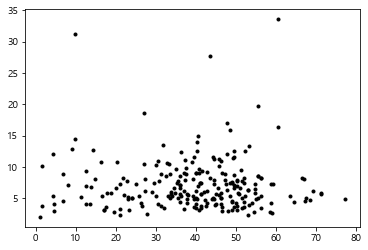

In [1882]:
plt.plot(L['혼잡도'], L['포름알데히드'], 'k.')

---

---

# 포름알데히드 모델 구현

In [1883]:
C.corr()['혼잡도']

미세먼지      0.31623
이산화탄소    -0.62637
포름알데히드    0.91666
일산화탄소    -0.01277
혼잡도       1.00000
Name: 혼잡도, dtype: float64

- 혼잡도와 포름알데히드의 상관계수가 -0.624133으로 음의 상관관계가 있는 것으로 보인다.
    이를 선형회귀를 사용하여 모델을 만들어보도록 하겠다.

In [1884]:
C

,호선,미세먼지,이산화탄소,포름알데히드,일산화탄소,혼잡도
0,1,67.33000,566.60000,5.66000,0.82000,28.66304
1,2,63.73784,607.62162,5.59459,0.68378,42.05455
2,3,57.27500,578.78125,6.12812,0.63437,34.91566
3,4,67.99524,542.66667,6.75238,0.62381,40.43323
4,5,67.36078,513.90196,7.60980,0.97255,84.12821
5,6,66.61842,510.76316,8.15526,0.68947,85.19583
6,7,72.56875,560.33333,7.81250,0.68958,97.31342
7,8,60.72353,531.88235,7.63529,0.52941,94.00000


In [1885]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = C[['혼잡도']]
y = C[['포름알데히드']]

model = LinearRegression()
model.fit(X, y)


# 로지스틱 회귀 모델 
model.predict(X)

array([[5.80837809],
       [6.23710681],
       [6.00855532],
       [6.18520034],
       [7.58409311],
       [7.61827299],
       [8.00621699],
       [7.9001381 ]])

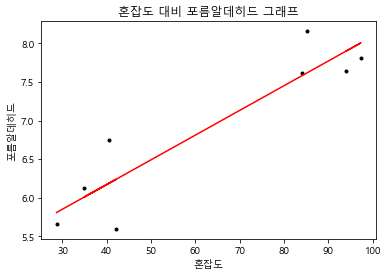

In [1886]:
plt.title('혼잡도 대비 포름알데히드 그래프')
plt.xlabel('혼잡도')
plt.ylabel('포름알데히드')

plt.plot(X, y, 'k.')
plt.plot(X, model.predict(X), color = 'r')

In [1887]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mean_squared_error(y_pred, y, squared = False) # MSE

0.3820204273867326

In [1888]:
data2

,호선,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,1호선,서울역,70.50000,606,4.00000,0.80000
1,1호선,시청,54.70000,581,4.40000,0.70000
2,1호선,종각,82.90000,471,11.50000,0.70000
3,1호선,종로3가,70.40000,481,11.00000,1.00000
4,1호선,종로5가,70.20000,597,5.70000,0.80000
...,...,...,...,...,...,...
249,8호선,남한산성입구,43.20000,504,5.90000,0.50000
250,8호선,단대오거리,47.00000,518,6.90000,0.50000
251,8호선,신흥,59.60000,511,31.30000,0.50000
252,8호선,수진,71.60000,490,12.90000,0.60000


In [1889]:
y

,포름알데히드
0,5.66000
1,5.59459
2,6.12812
3,6.75238
4,7.60980
5,8.15526
6,7.81250
7,7.63529


---

# 혼잡도 예측 모델

In [1890]:
data1['역명'].value_counts()['왕십리'] # 18 / 12 / 6 ==> 상.하선, 평일 토요일 일요일

12

In [1891]:
A = data1.drop('호선', axis=1).groupby('역명').mean().transpose().mean() # 지하철별 평균 혼잡도
A

역명
가락시장       64.41171
가산디지털단지   102.12917
강남         51.53833
강남구청      102.28833
강동         83.34042
             ...   
홍제         38.00417
화곡         82.43042
화랑대        71.89708
회현         43.12583
효창공원앞      89.13750
Length: 241, dtype: float64

In [1892]:
A = pd.DataFrame(A).reset_index()
A.columns = ['역명', '혼잡도']
A

,역명,혼잡도
0,가락시장,64.41171
1,가산디지털단지,102.12917
2,강남,51.53833
3,강남구청,102.28833
4,강동,83.34042
...,...,...
236,홍제,38.00417
237,화곡,82.43042
238,화랑대,71.89708
239,회현,43.12583


In [1893]:
(A['역명'] == '남부터미널').sum()

1

In [1894]:
A['버스터미널'] = 0

In [1895]:
A.loc[A['역명'] == '고속터미널', '버스터미널'] = 1
A.loc[A['역명'] == '남부터미널', '버스터미널'] = 1
A.loc[A['역명'] == '강변', '버스터미널'] = 1
A.loc[A['역명'] == '망우', '버스터미널'] = 1

In [1896]:
A.corr()

,혼잡도,버스터미널
혼잡도,1.00000,-0.07075
버스터미널,-0.07075,1.00000


In [1897]:
line = pd.DataFrame(data1['역명'].value_counts())/6
line

,역명
종로3가,3.00000
동대문역사문화공원,3.00000
을지로4가,2.00000
고속터미널,2.00000
천호,2.00000
...,...
먹골,1.00000
상왕십리,1.00000
문정,1.00000
방화,1.00000


In [1898]:
line = line.reset_index()
line.columns = ['역명', '역수']

In [1899]:
pd.merge(line, A).corr()

,역수,혼잡도,버스터미널
역수,1.00000,-0.09685,0.05273
혼잡도,-0.09685,1.00000,-0.07075
버스터미널,0.05273,-0.07075,1.00000


In [1900]:
line

,역명,역수
0,종로3가,3.00000
1,동대문역사문화공원,3.00000
2,을지로4가,2.00000
3,고속터미널,2.00000
4,천호,2.00000
...,...,...
236,먹골,1.00000
237,상왕십리,1.00000
238,문정,1.00000
239,방화,1.00000


In [1901]:
new_data1 = pd.merge(data1, line)
new_data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00,역수
0,평일,1,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,15.90000,17.10000,16.00000,19.00000,15.20000,10.50000,7.80000,6.00000,0.90000,2.00000
1,평일,1,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,31.20000,37.60000,44.60000,45.60000,37.80000,28.80000,19.30000,7.10000,0.40000,2.00000
2,평일,4,426,서울역,상선,9.00000,16.70000,21.60000,23.60000,33.00000,...,31.40000,30.70000,33.80000,34.00000,25.90000,26.50000,24.50000,15.20000,9.30000,2.00000
3,평일,4,426,서울역,하선,22.40000,16.60000,13.30000,16.90000,23.50000,...,26.20000,34.00000,33.60000,40.60000,30.20000,27.90000,23.90000,10.10000,5.50000,2.00000
4,토요일,1,150,서울역,상선,8.10000,13.20000,15.60000,14.40000,15.90000,...,16.50000,15.90000,16.80000,18.90000,14.40000,12.50000,18.40000,NaN,NaN,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,평일,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1664,토요일,8,2827,모란,상선,2.40000,2.70000,2.20000,2.10000,2.30000,...,6.50000,6.70000,6.80000,6.70000,5.40000,5.50000,3.20000,NaN,NaN,1.00000
1665,토요일,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,1.00000
1666,일요일,8,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,5.10000,5.90000,5.30000,5.70000,4.20000,3.40000,1.50000,NaN,NaN,1.00000


---

## 08시 18시 혼잡도 버스터미널 여부와 비교

In [1902]:
B = data1[['역명', '8:30', '18:30']]
B

,역명,8:30,18:30
0,서울역,74.50000,42.70000
1,서울역,25.20000,76.50000
2,시청,51.70000,48.70000
3,시청,26.40000,73.40000
4,종각,28.70000,58.20000
...,...,...,...
1663,신흥,6.00000,5.50000
1664,수진,4.10000,9.10000
1665,수진,5.80000,3.10000
1666,모란,3.10000,9.40000


In [1903]:
B.groupby('역명').mean().corr()

,8:30,18:30
8:30,1.00000,0.91953
18:30,0.91953,1.00000


In [1904]:
B['버스터미널'] = 0

In [1905]:
B

,역명,8:30,18:30,버스터미널
0,서울역,74.50000,42.70000,0
1,서울역,25.20000,76.50000,0
2,시청,51.70000,48.70000,0
3,시청,26.40000,73.40000,0
4,종각,28.70000,58.20000,0
...,...,...,...,...
1663,신흥,6.00000,5.50000,0
1664,수진,4.10000,9.10000,0
1665,수진,5.80000,3.10000,0
1666,모란,3.10000,9.40000,0


In [1906]:
B[B['버스터미널'] == 0]

,역명,8:30,18:30,버스터미널
0,서울역,74.50000,42.70000,0
1,서울역,25.20000,76.50000,0
2,시청,51.70000,48.70000,0
3,시청,26.40000,73.40000,0
4,종각,28.70000,58.20000,0
...,...,...,...,...
1663,신흥,6.00000,5.50000,0
1664,수진,4.10000,9.10000,0
1665,수진,5.80000,3.10000,0
1666,모란,3.10000,9.40000,0


In [1907]:
B.loc[B['역명'] == '고속터미널', '버스터미널'] = 1
B.loc[B['역명'] == '남부터미널', '버스터미널'] = 1
B.loc[B['역명'] == '강변', '버스터미널'] = 1
B.loc[B['역명'] == '망우', '버스터미널'] = 1

In [1908]:
B.corr()

,8:30,18:30,버스터미널
8:30,1.00000,0.31776,0.03932
18:30,0.31776,1.00000,0.07314
버스터미널,0.03932,0.07314,1.00000


 이상하게나온다. 평일만 해서 해보자

In [1909]:
data1['조사일자'] == '평일'

0        True
1        True
2        True
3        True
4        True
        ...  
1663    False
1664    False
1665    False
1666    False
1667    False
Name: 조사일자, Length: 1668, dtype: bool

In [1910]:
L = data1.loc[data1['조사일자'] == '평일', :] # 조사일자가 평일인거만

In [1911]:
L = L.groupby('역명').mean()

In [1912]:
L = L.transpose().mean().reset_index()

In [1913]:
L

,역명,0
0,가락시장,70.12625
1,가산디지털단지,110.76250
2,강남,62.50125
3,강남구청,107.02625
4,강동,86.26875
...,...,...
236,홍제,44.77000
237,화곡,86.62125
238,화랑대,72.86375
239,회현,45.42625


In [1914]:
L['버스터미널'] = 0

In [1915]:
L.loc[L['역명'] == '고속터미널', '버스터미널'] = 1
L.loc[L['역명'] == '남부터미널', '버스터미널'] = 1
L.loc[L['역명'] == '강변', '버스터미널'] = 1
L.loc[L['역명'] == '망우', '버스터미널'] = 1

In [1916]:
L.corr()

,0,버스터미널
0,1.00000,-0.06237
버스터미널,-0.06237,1.00000


---

- 호선은 범주형 데이터이기 때문에 수치로 들어가면 모델이 호선의 번호가 작으면 값이 커지고, 호선의 번호가 크면 값이 작아진다는 식으로 학습할 수 있음.
    
    
    따라서 원핫 인코딩을 사용하여 범주화해주었습니다.

In [1917]:
data1['역번호']

0        150
1        150
2        151
3        151
4        152
        ... 
1663    2825
1664    2826
1665    2826
1666    2827
1667    2827
Name: 역번호, Length: 1668, dtype: int64

In [1918]:
dummy = pd.get_dummies(data1['호선'], prefix='호선')

In [1919]:
dummy

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1663,0,0,0,0,0,0,0,1,0,0
1664,0,0,0,0,0,0,0,1,0,0
1665,0,0,0,0,0,0,0,1,0,0
1666,0,0,0,0,0,0,0,1,0,0


In [1920]:
dummy['역번호'] = data1['역번호']

In [1921]:
dummy

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호
0,1,0,0,0,0,0,0,0,0,0,150
1,1,0,0,0,0,0,0,0,0,0,150
2,1,0,0,0,0,0,0,0,0,0,151
3,1,0,0,0,0,0,0,0,0,0,151
4,1,0,0,0,0,0,0,0,0,0,152
...,...,...,...,...,...,...,...,...,...,...,...
1663,0,0,0,0,0,0,0,1,0,0,2825
1664,0,0,0,0,0,0,0,1,0,0,2826
1665,0,0,0,0,0,0,0,1,0,0,2826
1666,0,0,0,0,0,0,0,1,0,0,2827


In [1922]:
avg = pd.Series(data1.groupby('역번호').mean().transpose().mean())
# avg 역 번호 별 하루동안의 평균 혼잡도

In [1923]:
avg = pd.DataFrame(avg).reset_index()


In [1924]:
avg

,역번호,0
0,150,28.72479
1,151,27.41453
2,152,26.81923
3,153,27.07350
4,154,27.15427
...,...,...
273,2823,13.45598
274,2824,10.12179
275,2825,7.81111
276,2826,7.02735


In [1925]:
avg.columns = '역번호', '혼잡도'

In [1926]:
avg

,역번호,혼잡도
0,150,28.72479
1,151,27.41453
2,152,26.81923
3,153,27.07350
4,154,27.15427
...,...,...
273,2823,13.45598
274,2824,10.12179
275,2825,7.81111
276,2826,7.02735


In [1927]:
pd.merge(avg, dummy).drop('역번호', axis=1).corr()['혼잡도'].sort_values(ascending=False)

혼잡도        1.00000
호선_2       0.40741
호선_7       0.11844
호선_4       0.10818
호선_3       0.01929
호선_1      -0.02518
호선_신정지선   -0.04270
호선_8      -0.06338
호선_성수지선   -0.18740
호선_5      -0.24044
호선_6      -0.26386
Name: 혼잡도, dtype: float64

In [1928]:
avg

,역번호,혼잡도
0,150,28.72479
1,151,27.41453
2,152,26.81923
3,153,27.07350
4,154,27.15427
...,...,...
273,2823,13.45598
274,2824,10.12179
275,2825,7.81111
276,2826,7.02735


In [1929]:
dummy = dummy.drop_duplicates()

In [1930]:
dummy

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호
0,1,0,0,0,0,0,0,0,0,0,150
2,1,0,0,0,0,0,0,0,0,0,151
4,1,0,0,0,0,0,0,0,0,0,152
6,1,0,0,0,0,0,0,0,0,0,153
8,1,0,0,0,0,0,0,0,0,0,154
...,...,...,...,...,...,...,...,...,...,...,...
546,0,0,0,0,0,0,0,1,0,0,2823
548,0,0,0,0,0,0,0,1,0,0,2824
550,0,0,0,0,0,0,0,1,0,0,2825
552,0,0,0,0,0,0,0,1,0,0,2826


In [1931]:
pd.merge(dummy, avg, how = 'right')

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호,혼잡도
0,1,0,0,0,0,0,0,0,0,0,150,28.72479
1,1,0,0,0,0,0,0,0,0,0,151,27.41453
2,1,0,0,0,0,0,0,0,0,0,152,26.81923
3,1,0,0,0,0,0,0,0,0,0,153,27.07350
4,1,0,0,0,0,0,0,0,0,0,154,27.15427
...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,1,0,0,2823,13.45598
274,0,0,0,0,0,0,0,1,0,0,2824,10.12179
275,0,0,0,0,0,0,0,1,0,0,2825,7.81111
276,0,0,0,0,0,0,0,1,0,0,2826,7.02735


In [1932]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,15.10000,15.90000,17.10000,16.00000,19.00000,15.20000,10.50000,7.80000,6.00000,0.90000
1,평일,1,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,36.50000,31.20000,37.60000,44.60000,45.60000,37.80000,28.80000,19.30000,7.10000,0.40000
2,평일,1,151,시청,상선,7.70000,11.20000,19.60000,24.40000,36.20000,...,18.70000,18.30000,20.70000,22.00000,24.00000,18.70000,13.70000,10.00000,6.90000,1.00000
3,평일,1,151,시청,하선,9.50000,11.30000,11.60000,16.70000,23.20000,...,32.00000,27.70000,34.80000,39.30000,37.40000,36.30000,23.00000,18.10000,4.00000,1.60000
4,평일,1,152,종각,상선,6.30000,8.10000,15.50000,16.60000,22.70000,...,25.80000,24.20000,30.00000,31.90000,34.00000,26.80000,18.80000,12.50000,9.10000,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8,2825,신흥,하선,6.90000,3.40000,4.00000,2.80000,6.30000,...,3.50000,3.00000,3.10000,3.50000,2.90000,2.30000,2.10000,1.70000,NaN,NaN
1664,일요일,8,2826,수진,상선,2.40000,2.20000,2.20000,2.20000,2.50000,...,4.60000,6.40000,5.90000,4.80000,5.50000,4.40000,3.40000,1.50000,NaN,NaN
1665,일요일,8,2826,수진,하선,11.00000,3.70000,3.20000,2.60000,4.10000,...,2.80000,2.30000,1.90000,1.40000,1.30000,1.40000,1.00000,0.40000,NaN,NaN
1666,일요일,8,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,4.50000,5.10000,5.90000,5.30000,5.70000,4.20000,3.40000,1.50000,NaN,NaN


In [1933]:
dummy

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호
0,1,0,0,0,0,0,0,0,0,0,150
2,1,0,0,0,0,0,0,0,0,0,151
4,1,0,0,0,0,0,0,0,0,0,152
6,1,0,0,0,0,0,0,0,0,0,153
8,1,0,0,0,0,0,0,0,0,0,154
...,...,...,...,...,...,...,...,...,...,...,...
546,0,0,0,0,0,0,0,1,0,0,2823
548,0,0,0,0,0,0,0,1,0,0,2824
550,0,0,0,0,0,0,0,1,0,0,2825
552,0,0,0,0,0,0,0,1,0,0,2826


2호선의 혼잡도와의 상관계수가 0.4로 높고, 5호선이 -0.24, 6호선이 -0.26으로 낮다.

In [1934]:
data1 = pd.merge(data1, dummy)

In [1935]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선
0,평일,1,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,1,0,0,0,0,0,0,0,0,0
1,평일,1,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,1,0,0,0,0,0,0,0,0,0
2,토요일,1,150,서울역,상선,8.10000,13.20000,15.60000,14.40000,15.90000,...,1,0,0,0,0,0,0,0,0,0
3,토요일,1,150,서울역,하선,18.30000,13.70000,9.70000,13.80000,9.70000,...,1,0,0,0,0,0,0,0,0,0
4,일요일,1,150,서울역,상선,3.40000,7.40000,8.50000,7.90000,10.30000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,평일,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,0,1,0,0
1664,토요일,8,2827,모란,상선,2.40000,2.70000,2.20000,2.10000,2.30000,...,0,0,0,0,0,0,0,1,0,0
1665,토요일,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,0,1,0,0
1666,일요일,8,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,0,0,0,0,0,0,0,1,0,0


In [1936]:
data1.drop('역번호', axis=1).groupby('조사일자').mean()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선
조사일자,,,,,,,,,,,,,,,,,,,,,
일요일,10.75037,9.99655,8.85191,8.63829,10.72868,14.91579,16.08040,20.68439,22.56007,22.96806,...,0.03597,0.15468,0.12230,0.09353,0.18345,0.13669,0.18345,0.06115,0.01439,0.01439
토요일,18.77537,16.53593,13.27822,13.11942,16.40581,23.73811,24.58566,28.23140,29.11397,28.66770,...,0.03597,0.15468,0.12230,0.09353,0.18345,0.13669,0.18345,0.06115,0.01439,0.01439
평일,20.60845,19.50594,21.23112,29.36691,41.23525,56.50144,45.83004,37.76637,32.57554,27.16637,...,0.03597,0.15468,0.12230,0.09353,0.18345,0.13669,0.18345,0.06115,0.01439,0.01439


- 조사일자의 경우 범주형이지만 평일 > 토요일 > 일요일 의 경향성이 있기에, 평일은 2, 토요일은 1, 일요일은 0의 숫자를 부여하도록 하겠다.

In [1937]:
data1.loc[data1['조사일자'] == '평일', '조사일자'] = 2
data1.loc[data1['조사일자'] == '토요일', '조사일자'] = 1
data1.loc[data1['조사일자'] == '일요일', '조사일자'] = 0

data1['조사일자'] = data1['조사일자'].astype(int) # 오브젝트를 int형으로

In [1938]:
avg = data1[['5:30', '6:00', '6:30', '7:00', '7:30','8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30',
       '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
       '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
       '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30',
       '24:00:00', '24:30:00']].transpose().mean()

In [1939]:
avg

0      29.74615
1      34.38974
2      33.87297
3      36.68108
4      20.48919
         ...   
1663    0.00000
1664    6.28649
1665    0.00000
1666    5.85946
1667    0.00000
Length: 1668, dtype: float64

In [1940]:
data1['평균혼잡도'] = avg

In [1941]:
data1

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도
0,2,1,150,서울역,상선,8.20000,12.90000,21.50000,28.40000,46.70000,...,0,0,0,0,0,0,0,0,0,29.74615
1,2,1,150,서울역,하선,11.80000,13.50000,12.20000,17.80000,26.40000,...,0,0,0,0,0,0,0,0,0,34.38974
2,1,1,150,서울역,상선,8.10000,13.20000,15.60000,14.40000,15.90000,...,0,0,0,0,0,0,0,0,0,33.87297
3,1,1,150,서울역,하선,18.30000,13.70000,9.70000,13.80000,9.70000,...,0,0,0,0,0,0,0,0,0,36.68108
4,0,1,150,서울역,상선,3.40000,7.40000,8.50000,7.90000,10.30000,...,0,0,0,0,0,0,0,0,0,20.48919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,2,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,1,0,0,0.00000
1664,1,8,2827,모란,상선,2.40000,2.70000,2.20000,2.10000,2.30000,...,0,0,0,0,0,0,1,0,0,6.28649
1665,1,8,2827,모란,하선,0.00000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,1,0,0,0.00000
1666,0,8,2827,모란,상선,1.80000,2.00000,1.70000,1.70000,1.80000,...,0,0,0,0,0,0,1,0,0,5.85946


In [1942]:
data1.columns

Index(['조사일자', '호선', '역번호', '역명', '구분', '5:30', '6:00', '6:30', '7:00', '7:30',
       '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30',
       '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
       '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
       '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30',
       '24:00:00', '24:30:00', '호선_1', '호선_2', '호선_3', '호선_4', '호선_5', '호선_6',
       '호선_7', '호선_8', '호선_성수지선', '호선_신정지선', '평균혼잡도'],
      dtype='object')

In [1943]:
new_data1 = data1[['조사일자', '호선', '역번호', '역명', '구분', 
                   '호선_1', '호선_2', '호선_3', '호선_4', '호선_5', 
                   '호선_6','호선_7', '호선_8', '호선_성수지선', '호선_신정지선', 
                   '평균혼잡도']]

In [1944]:
new_data1

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도
0,2,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,29.74615
1,2,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,34.38974
2,1,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,33.87297
3,1,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,36.68108
4,0,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,20.48919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,2,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000
1664,1,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,6.28649
1665,1,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000
1666,0,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,5.85946


In [1945]:
index = data1[['역번호', '역명']]

In [1946]:
index = index.drop_duplicates()
index

,역번호,역명
0,150,서울역
6,151,시청
12,152,종각
18,153,종로3가
24,154,종로5가
...,...,...
1638,2823,남한산성입구
1644,2824,단대오거리
1650,2825,신흥
1656,2826,수진


In [1947]:
new_data1

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도
0,2,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,29.74615
1,2,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,34.38974
2,1,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,33.87297
3,1,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,36.68108
4,0,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,20.48919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,2,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000
1664,1,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,6.28649
1665,1,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000
1666,0,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,5.85946


In [1948]:
new_data1.corr()['조사일자']['평균혼잡도']

0.3215245385071439

조사일자와 평균혼잡도 사이에 0.3의 상관계수가 있다.

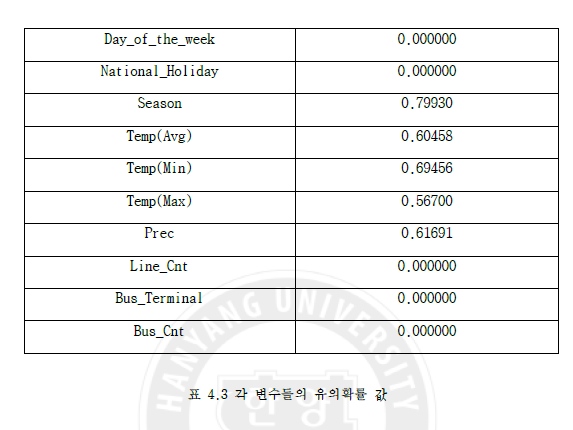

논문에 따르면 역 근처에 버스터미널이 있을 때 승하차 인원이 많다는것 가정이 유의하다고 합니다.
이에따라 버스터미널 변수도 추가해주었습니다.


In [1949]:
new_data1['버스터미널'] = 0

new_data1.loc[new_data1['역명'] == '고속터미널', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '남부터미널', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '강변', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '망우', '버스터미널'] = 1

In [1950]:
new_data1

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
0,2,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,29.74615,0
1,2,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,34.38974,0
2,1,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,33.87297,0
3,1,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,36.68108,0
4,0,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,20.48919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,2,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000,0
1664,1,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,6.28649,0
1665,1,8,2827,모란,하선,0,0,0,0,0,0,0,1,0,0,0.00000,0
1666,0,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,5.85946,0


- 여기서 평균혼잡도가 0인 데이터와 결측치는 삭제해주도록 하겠습니다.

In [1951]:
new_data1 = new_data1.drop(new_data1[new_data1['평균혼잡도'] == 0].index, axis = 0)
new_data1 = new_data1.drop(new_data1[new_data1['평균혼잡도'].isna()].index, axis = 0)

In [1952]:
new_data1

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
0,2,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,29.74615,0
1,2,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,34.38974,0
2,1,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,33.87297,0
3,1,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,36.68108,0
4,0,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,20.48919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,0,8,2826,수진,상선,0,0,0,0,0,0,0,1,0,0,6.59189,0
1661,0,8,2826,수진,하선,0,0,0,0,0,0,0,1,0,0,5.92703,0
1662,2,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,7.81026,0
1664,1,8,2827,모란,상선,0,0,0,0,0,0,0,1,0,0,6.28649,0


- '구분'변수

In [1953]:
new_data1[new_data1['구분'] == '상선'].head(3)

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
0,2,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,29.74615,0
2,1,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,33.87297,0
4,0,1,150,서울역,상선,1,0,0,0,0,0,0,0,0,0,20.48919,0


In [1954]:
new_data1[new_data1['구분'] == '하선'].head(3)

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
1,2,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,34.38974,0
3,1,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,36.68108,0
5,0,1,150,서울역,하선,1,0,0,0,0,0,0,0,0,0,22.24054,0


- 하선 > 상선

In [1955]:
new_data1[new_data1['구분'] == '내선'].head(3)

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
60,2,2,201,시청,내선,0,1,0,0,0,0,0,0,0,0,38.96154,0
62,1,2,201,시청,내선,0,1,0,0,0,0,0,0,0,0,37.23514,0
64,0,2,201,시청,내선,0,1,0,0,0,0,0,0,0,0,30.56757,0


In [1956]:
new_data1[new_data1['구분'] == '외선'].head(3)

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
61,2,2,201,시청,외선,0,1,0,0,0,0,0,0,0,0,40.05641,0
63,1,2,201,시청,외선,0,1,0,0,0,0,0,0,0,0,41.32973,0
65,0,2,201,시청,외선,0,1,0,0,0,0,0,0,0,0,30.78378,0


- 외선 > 내선

하선 > 상선, 외선 > 내선이므로 하선과 외선에는 1, 상선과 내선에는 0을 부여하도록 하겠습니다.

In [1957]:
new_data1.loc[new_data1['구분']=='하선', '구분'] = 1
new_data1.loc[new_data1['구분']=='외선', '구분'] = 1

new_data1.loc[new_data1['구분']=='상선', '구분'] = 0
new_data1.loc[new_data1['구분']=='내선', '구분'] = 0

new_data1['구분'] = new_data1['조사일자'].astype(int) # 오브젝트를 int형으로

In [1958]:
new_data1

,조사일자,호선,역번호,역명,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
0,2,1,150,서울역,2,1,0,0,0,0,0,0,0,0,0,29.74615,0
1,2,1,150,서울역,2,1,0,0,0,0,0,0,0,0,0,34.38974,0
2,1,1,150,서울역,1,1,0,0,0,0,0,0,0,0,0,33.87297,0
3,1,1,150,서울역,1,1,0,0,0,0,0,0,0,0,0,36.68108,0
4,0,1,150,서울역,0,1,0,0,0,0,0,0,0,0,0,20.48919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,0,8,2826,수진,0,0,0,0,0,0,0,0,1,0,0,6.59189,0
1661,0,8,2826,수진,0,0,0,0,0,0,0,0,1,0,0,5.92703,0
1662,2,8,2827,모란,2,0,0,0,0,0,0,0,1,0,0,7.81026,0
1664,1,8,2827,모란,1,0,0,0,0,0,0,0,1,0,0,6.28649,0


이제 독립변수를 ['조사일자', '호선', '버스터미널', '구분'], 종속변수를 ['평균혼잡도']로 하여 모델을 만들어 보겠습니다.

In [1959]:
from sklearn.model_selection import train_test_split

In [1986]:
x_train, x_test, y_train, y_test = train_test_split(new_data1[['조사일자', '구분', '호선_1', '호선_2', '호선_3', '호선_4', '호선_5',
       '호선_6', '호선_7', '호선_8', '호선_성수지선', '호선_신정지선']], 
                                                    new_data1['평균혼잡도'], test_size = 0.2, shuffle = True, random_state = 30)

In [1987]:
x_train

,조사일자,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선
909,1,1,0,0,0,0,1,0,0,0,0,0
327,1,1,0,0,0,0,0,0,0,0,1,0
1207,2,2,0,0,0,0,0,1,0,0,0,0
606,2,2,0,0,0,1,0,0,0,0,0,0
1215,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
934,0,0,0,0,0,0,1,0,0,0,0,0
1200,2,2,0,0,0,0,0,1,0,0,0,0
506,1,1,0,0,1,0,0,0,0,0,0,0
956,1,1,0,0,0,0,1,0,0,0,0,0


In [1988]:
y_train

909    33.55405
327    12.00000
1207   26.80513
606    36.09487
1215   20.80541
         ...   
934    22.61622
1200   32.19744
506    34.19189
956    29.90811
427    40.15128
Name: 평균혼잡도, Length: 1293, dtype: float64

In [1989]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1990]:
model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor()

In [1991]:
pred = model.predict(x_test)

In [1992]:
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(np.mean(mean_squared_error(y_test, pred))))
rmse

8.507588810288807

In [1993]:
mean_squared_error(y_test, pred)

72.37906736495131

In [1995]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123,max_depth=6)

rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=6, oob_score=True, random_state=123)

In [1996]:
predrf = rf.predict(x_test)

In [1997]:
mean_squared_error(y_test, predrf)

70.1079826131792

In [1998]:
from sklearn.linear_model import LinearRegression

In [1999]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predl = linear.predict(x_test)
mean_squared_error(y_test, predl)

72.90714221949128

In [2001]:
# 버스터미널 있으면
# boost : 72.3 rf : 68, linear : 72

# 버스터미널 없으면
# boost : 72.3 rg : 70, linear 72.9